In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
num_epochs = 10
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)



In [3]:
# Autoencoder model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32)
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [4]:
# Initialize the autoencoder
model = Autoencoder().to(device)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [6]:
#  Training the autoencoder
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, _) in enumerate(train_loader):
        # Flatten the images
        images = images.reshape(-1, 28 * 28).to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, images)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, total_step, loss.item()))


Epoch [1/10], Step [100/600], Loss: 0.0459
Epoch [1/10], Step [200/600], Loss: 0.0360
Epoch [1/10], Step [300/600], Loss: 0.0282
Epoch [1/10], Step [400/600], Loss: 0.0268
Epoch [1/10], Step [500/600], Loss: 0.0248
Epoch [1/10], Step [600/600], Loss: 0.0214
Epoch [2/10], Step [100/600], Loss: 0.0231
Epoch [2/10], Step [200/600], Loss: 0.0219
Epoch [2/10], Step [300/600], Loss: 0.0216
Epoch [2/10], Step [400/600], Loss: 0.0189
Epoch [2/10], Step [500/600], Loss: 0.0220
Epoch [2/10], Step [600/600], Loss: 0.0185
Epoch [3/10], Step [100/600], Loss: 0.0214
Epoch [3/10], Step [200/600], Loss: 0.0181
Epoch [3/10], Step [300/600], Loss: 0.0181
Epoch [3/10], Step [400/600], Loss: 0.0197
Epoch [3/10], Step [500/600], Loss: 0.0188
Epoch [3/10], Step [600/600], Loss: 0.0169
Epoch [4/10], Step [100/600], Loss: 0.0178
Epoch [4/10], Step [200/600], Loss: 0.0167
Epoch [4/10], Step [300/600], Loss: 0.0175
Epoch [4/10], Step [400/600], Loss: 0.0152
Epoch [4/10], Step [500/600], Loss: 0.0165
Epoch [4/10

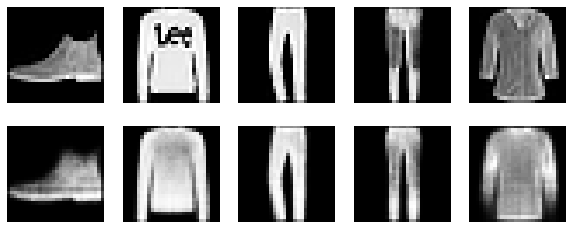

In [7]:
# Testing the autoencoder
with torch.no_grad():
    for images, _ in test_loader:
        images = images.reshape(-1, 28 * 28).to(device)
        outputs = model(images)
        outputs = outputs.reshape(-1, 1, 28, 28)
        break

# Plotting the original and reconstructed images
plt.figure(figsize=(10, 4))
for i in range(5):
    # Original images
    ax = plt.subplot(2, 5, i+1)
    plt.imshow(images[i].cpu().reshape(28, 28), cmap='gray')
    ax.axis('off')
    
    # Reconstructed images
    ax = plt.subplot(2, 5, i+6)
    plt.imshow(outputs[i].cpu().reshape(28, 28), cmap='gray')
    ax.axis('off')

plt.show()